**1. Create a regression model using ‘citympg’ as the dependent variable and ‘horsepower’ as the independent variable. Report all model statistics and comment on the model diagnostics.**

In [9]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('CarPrice_Assignment.csv')

X = df['horsepower']
y = df['citympg']

X = sm.add_constant(X)

# Create the regression model
model_citympg = sm.OLS(y, X).fit()

print(model_citympg.summary())

                            OLS Regression Results                            
Dep. Variable:                citympg   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     364.6
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           3.32e-47
Time:                        16:24:46   Log-Likelihood:                -570.04
No. Observations:                 205   AIC:                             1144.
Df Residuals:                     203   BIC:                             1151.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.0246      0.773     50.473      0.0

**2. Create the same regression model keeping ‘highwaympg’ as the dependent variable and ‘horsepower’ as the independent variable. Report all model statistics and comment on the model diagnostics.**

In [10]:
X_highway = df['horsepower']
y_highway = df['highwaympg']

X_highway = sm.add_constant(X_highway)

# Create the regression model
model_highway = sm.OLS(y_highway, X_highway).fit()

print(model_highway.summary())

                            OLS Regression Results                            
Dep. Variable:             highwaympg   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     296.7
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           1.42e-41
Time:                        16:26:30   Log-Likelihood:                -593.61
No. Observations:                 205   AIC:                             1191.
Df Residuals:                     203   BIC:                             1198.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.7224      0.867     51.559      0.0

**3. Include a basic scatterplot of the data for both above as well.**

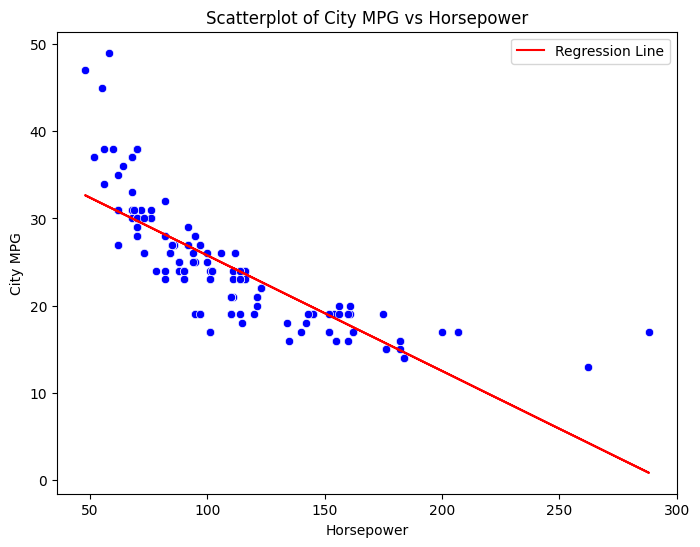

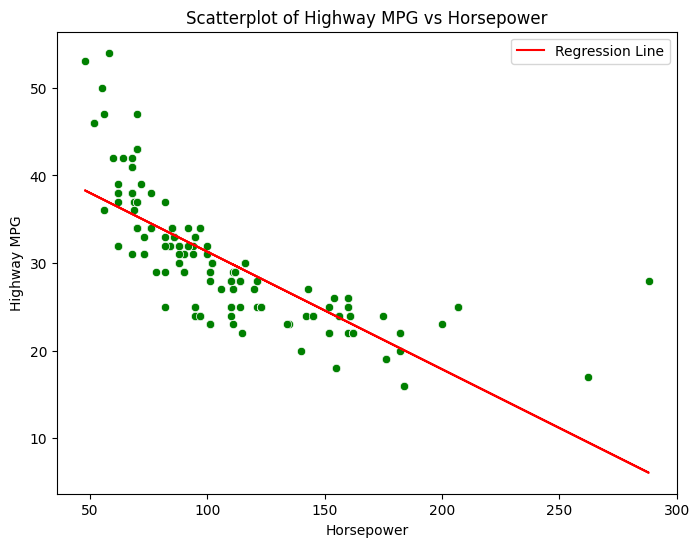

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot for citympg vs. horsepower
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['horsepower'], y=df['citympg'], color='blue')
plt.plot(df['horsepower'], model_citympg.predict(sm.add_constant(df['horsepower'])), color='red', label='Regression Line')
plt.title('Scatterplot of City MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('City MPG')
plt.legend()
plt.show()

# Scatterplot for highwaympg vs. horsepower
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['horsepower'], y=df['highwaympg'], color='green')
plt.plot(df['horsepower'], model_highway.predict(sm.add_constant(df['horsepower'])), color='red', label='Regression Line')
plt.title('Scatterplot of Highway MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Highway MPG')
plt.legend()
plt.show()

**4. Create another regression model using ‘citympg’ and ‘highwaympg’ as independent variables separately and ‘price’ as the dependent variable. Examine in your both regression models whether these data are positively or negatively correlated or not.**

In [12]:
# Regression Model 1: price as dependent and citympg as independent variable
X_citympg = sm.add_constant(df['citympg'])
model_price_citympg = sm.OLS(df['price'], X_citympg).fit()

# Display model statistics for price vs. citympg
print("Model 1: price vs citympg")
print(model_price_citympg.summary())

# Regression Model 2: price as dependent and highwaympg as independent variable
X_highwaympg = sm.add_constant(df['highwaympg'])  # Add constant term
model_price_highwaympg = sm.OLS(df['price'], X_highwaympg).fit()

# Display model statistics for price vs. highwaympg
print("\nModel 2: price vs highwaympg")
print(model_price_highwaympg.summary())


Model 1: price vs citympg
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     180.2
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           7.98e-30
Time:                        16:28:06   Log-Likelihood:                -2067.3
No. Observations:                 205   AIC:                             4139.
Df Residuals:                     203   BIC:                             4145.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.44e+04   16

### **Interpretation**

**Citympg → Price:**

- Coefficient: -837.40
- For every 1 unit increase in citympg (i.e., better fuel efficiency in the city), the car price decreases by approximately $837.
The relationship is statistically significant (p-value < 0.05).

**Highwaympg → Price:**

- Coefficient: -809.27
- For every 1 unit increase in highwaympg (i.e., better fuel efficiency on highways), the car price decreases by approximately $809.
This relationship is also statistically significant (p-value < 0.05).


This negative correlation might indicate that cars with better fuel efficiency (higher citympg and highwaympg) tend to be cheaper, possibly because they could be more economy-focused or smaller vehicles, which are typically less expensive compared to larger, luxury cars that may have lower mileage.

In both cases, the negative coefficients reflect that higher fuel efficiency (in both city and highway driving) tends to be associated with lower car prices.



**5. Create a regression model using two other variables from the ‘CarPrice_Assignment.csv’ dataset (i.e., not ‘highwaympg’, ‘citympg’ or ‘horsepower’ as independent variable). You can keep ‘price’ as dependent variable. Take any other two separately as independent variable and create two separate regression model if it can be ensured the existence of a reasonable underlying connection between the independent and dependent variables.**

Let's select two other variables from the dataset that can reasonably have a relationship with the car price (price). In this case, we will use:

- Enginesize: Larger engines are often found in more expensive vehicles.
- Curbweight: Heavier vehicles are often larger and potentially more expensive (e.g., SUVs, trucks).

In [14]:
# Model 1: Regression of 'price' on 'enginesize'
X_enginesize = df[['enginesize']]
y_price = df['price']

# Add a constant (intercept)
X_enginesize = sm.add_constant(X_enginesize)

# Create and fit the regression model
model_enginesize = sm.OLS(y_price, X_enginesize).fit()

# Output the model summary
print(model_enginesize.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     657.6
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           1.35e-65
Time:                        16:34:31   Log-Likelihood:                -1984.4
No. Observations:                 205   AIC:                             3973.
Df Residuals:                     203   BIC:                             3979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8005.4455    873.221     -9.168      0.0

In [15]:
# Model 2: Regression of 'price' on 'curbweight'
X_curbweight = df[['curbweight']]  # Independent variable
y_price = df['price']  # Dependent variable

# Add a constant (intercept)
X_curbweight = sm.add_constant(X_curbweight)

# Create and fit the regression model
model_curbweight = sm.OLS(y_price, X_curbweight).fit()

# Output the model summary
print(model_curbweight.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     468.6
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           1.21e-54
Time:                        16:35:02   Log-Likelihood:                -2009.8
No. Observations:                 205   AIC:                             4024.
Df Residuals:                     203   BIC:                             4030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.948e+04   1543.962    -12.614      0.0

**6. Report all model statistics and comment on the model diagnostics.**

**Statistics Summary**

**Model 1: Horsepower vs. City MPG**

R-squared: 0.642 |
Adjusted R-squared: 0.641

Coefficients: Intercept: 39.0246; Horsepower: -0.1326 (significant)

**Model 2: Horsepower vs. Highway MPG**

R-squared: 0.594 |
Adjusted R-squared: 0.592

Coefficients: Intercept: 44.7224; Horsepower: -0.1342 (significant)

**Model 3: City MPG vs. Price**

R-squared: 0.470 |
Adjusted R-squared: 0.468

Coefficients: Intercept: 34,400; City MPG: -837.40 (significant)

**Model 4: Highway MPG vs. Price**

R-squared: 0.487 |
Adjusted R-squared: 0.484

Coefficients: Intercept: 38,160; Highway MPG: -809.27 (significant)

**Model 5: Engine Size vs. Price**

R-squared: 0.764 |
Adjusted R-squared: 0.763

Coefficients: Intercept: -8005.45; Engine Size: 167.70 (significant)

**Model 6: Curb Weight vs. Price**

R-squared: 0.698 |
Adjusted R-squared: 0.696

Coefficients: Intercept: -19,480; Curb Weight: 12.82 (significant)


**Diagnostics:**

Overall, all models demonstrate significant relationships between the dependent and independent variables, with R-squared values indicating varying degrees of explained variance. Models 1 and 2 show that horsepower is a significant predictor of both city and highway MPG. Meanwhile, Models 5 and 6 reveal particularly strong predictive power, indicating that engine size and curb weight significantly influence vehicle price. However, diagnostics reveal issues with non-normality and positive autocorrelation in residuals across all models, indicating potential areas for improvement, such as transformations or alternative modeling approaches to enhance accuracy and reliability.

**7. Include a basic scatterplot of the data as well.**

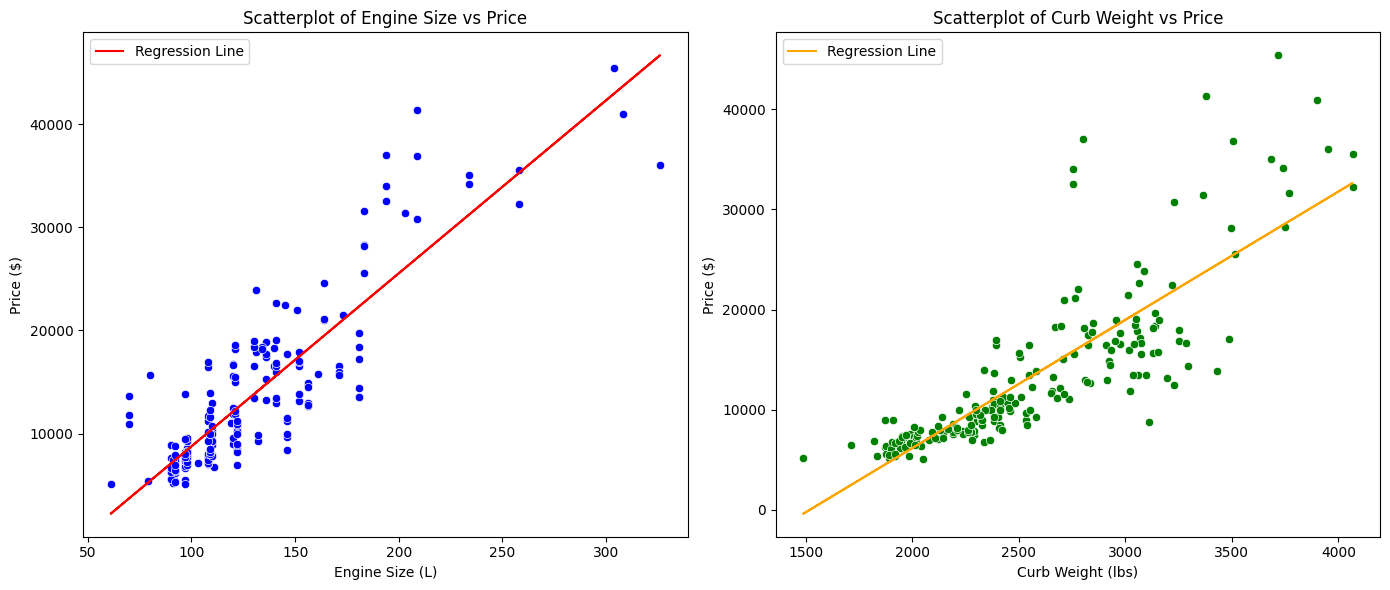

In [17]:
# Scatterplot for Engine Size vs. Price
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df['enginesize'], y=df['price'], color='blue')
plt.plot(df['enginesize'], model_enginesize.predict(sm.add_constant(df['enginesize'])), color='red', label='Regression Line')
plt.title('Scatterplot of Engine Size vs Price')
plt.xlabel('Engine Size (L)')
plt.ylabel('Price ($)')
plt.legend()

# Scatterplot for Curb Weight vs. Price
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['curbweight'], y=df['price'], color='green')
plt.plot(df['curbweight'], model_curbweight.predict(sm.add_constant(df['curbweight'])), color='orange', label='Regression Line')
plt.title('Scatterplot of Curb Weight vs Price')
plt.xlabel('Curb Weight (lbs)')
plt.ylabel('Price ($)')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

**8. Will be there any problem with using all of the variables (other than ‘highwaympg’ or ‘citympg’) in the given dataset as independent variables to predict the ‘price’ of Car? If it exist then identify the combination and discuss the possible problems.**

In [25]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('CarPrice_Assignment.csv')

# Select numeric variables except 'citympg' and 'highwaympg'
numeric_df = df.drop(['price', 'citympg', 'highwaympg'], axis=1).select_dtypes(include=[float, int])

independent_vars = sm.add_constant(numeric_df)

# Variance Inflation Factor (VIF) calculation
vif_data = pd.DataFrame()
vif_data['Feature'] = independent_vars.columns
vif_data['VIF'] = [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]

print(vif_data)


             Feature          VIF
0              const  4372.955598
1             car_ID     1.286613
2          symboling     1.756641
3          wheelbase     8.208089
4          carlength     8.635150
5           carwidth     5.687775
6          carheight     2.310410
7         curbweight    12.838282
8         enginesize     6.247614
9          boreratio     2.182438
10            stroke     1.191061
11  compressionratio     1.551007
12        horsepower     7.503419
13           peakrpm     2.053763


Features with a VIF value greater than 5 or 10 may indicate multicollinearity, suggesting that the independent variables are highly correlated. This can affect the reliability of coefficient estimates in regression models.

**Using all variables to predict 'price' may lead to several issues:**

**Multicollinearity:** High correlation among independent variables can inflate coefficient variances, making them unstable and difficult to interpret.

**Overfitting:** A complex model may capture noise rather than the actual relationship, resulting in poor performance on unseen data.

**Non-linearity:** Assuming linear relationships when they are non-linear can lead to inaccurate predictions, requiring polynomial or interaction terms.

**Redundant Information:** Including similar features adds noise and complicates model interpretation.

**Diminished Interpretability:** More variables can obscure the contribution of each predictor, making the model harder to understand.